# MAJOR PROJECT

In this project, we look at the contribution of different features in our dataset towards the price of a car and make an appropriate Machine Learning regression model for the same to predict car prices.

In [350]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

train = pd.read_excel('Data_Train.xlsx')
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [351]:
# Dataset Cleaning 

print(train.isnull().sum())
print('Size of training data set: ',train.shape)

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64
Size of training data set:  (6019, 12)


In [352]:
# We have 6019 rows of data and very small number of NA values. It's safe to drop these missing rows and it wont affect our model

pd.options.mode.chained_assignment = None 

train.dropna(how='any', inplace=True) 
train['Mileage'] = train.Mileage.str.replace('km/kg','')
train['Mileage'] = train.Mileage.str.replace('kmpl','') 
train['Engine'] = train.Engine.str.replace('CC','') 
train['Power'] = train['Power'].str.replace('bhp', '')
train['Power'] = train['Power'].str.strip() 
train = train[train['Power'] != 'null'] 

In [353]:
train['Power'] = train['Power'].astype(float) 
train['Mileage'] = train['Mileage'].astype(float) 
train['Engine'] = train['Engine'].astype(float)

train.head()
print(train.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


In [354]:
print('Current Dataset size: ', train.shape)
print('Features: ', train.columns.values)

brand = []
for name in train['Name'].str.split():
    brand.append(name[0]) 
train['Brand'] = brand
train.head()

Current Dataset size:  (5872, 12)
Features:  ['Name' 'Location' 'Year' 'Kilometers_Driven' 'Fuel_Type' 'Transmission'
 'Owner_Type' 'Mileage' 'Engine' 'Power' 'Seats' 'Price']


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [355]:
# LABEL ENCODING 
# We need to convert categorical features into numerical values so that our models can interpret their contribution. 

train['Fuel_Type'] = train['Fuel_Type'].astype('category') 
train['Transmission'] = train['Transmission'].astype('category') 
train['Location'] = train['Location'].astype('category') 
train['Brand'] = train['Brand'].astype('category') 
train['Owner_Type'] = train['Owner_Type'].astype('category') 

# EDA TASKS 

In this segment, we try to observe independent correlations of our attributes with price

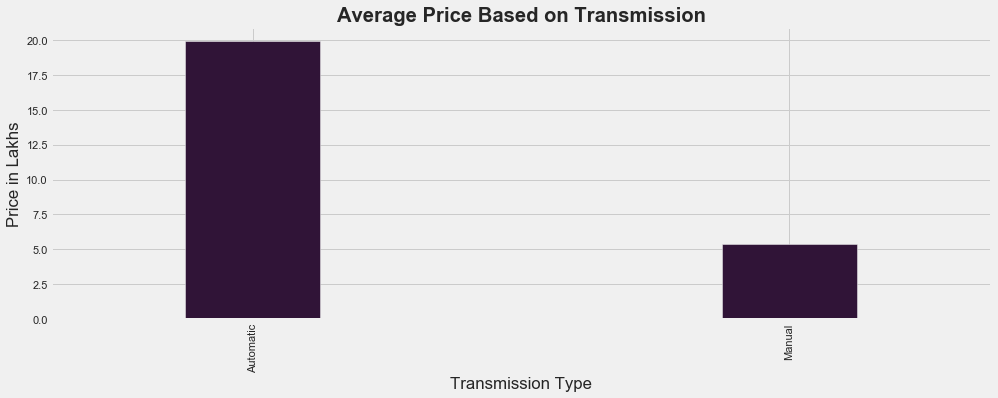

In [356]:
# Transmission vs Price

plt.style.use('fivethirtyeight')

train.groupby('Transmission')['Price'].mean().plot(kind='bar', colormap='twilight_shifted', width=0.25)
plt.title('Average Price Based on Transmission', fontweight='bold')
plt.xlabel('Transmission Type') 
plt.ylabel('Price in Lakhs') 
plt.show()

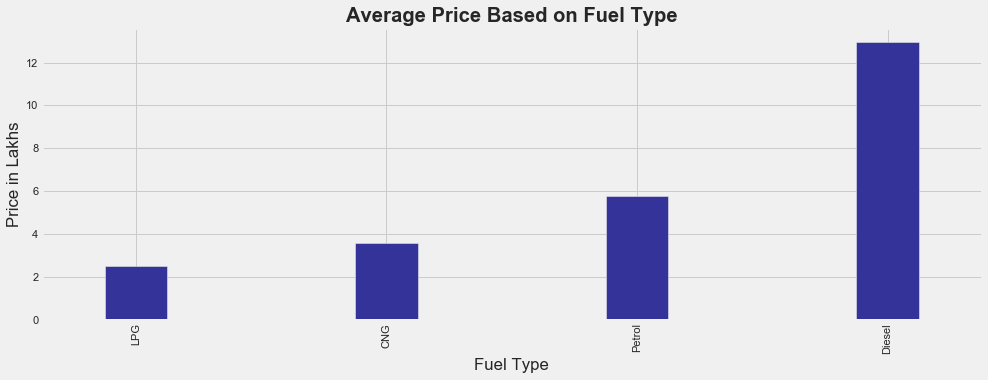

In [357]:
# Fuel Type vs Price

train.groupby('Fuel_Type')['Price'].mean().sort_values().plot(kind='bar', colormap='terrain', width=0.25)
plt.title('Average Price Based on Fuel Type', fontweight='bold')
plt.xlabel('Fuel Type') 
plt.ylabel('Price in Lakhs') 
plt.show()


We can observe here that there's an evident correlation between fuel type and price. 
**LPG<CNG<Petrol<Diesel**

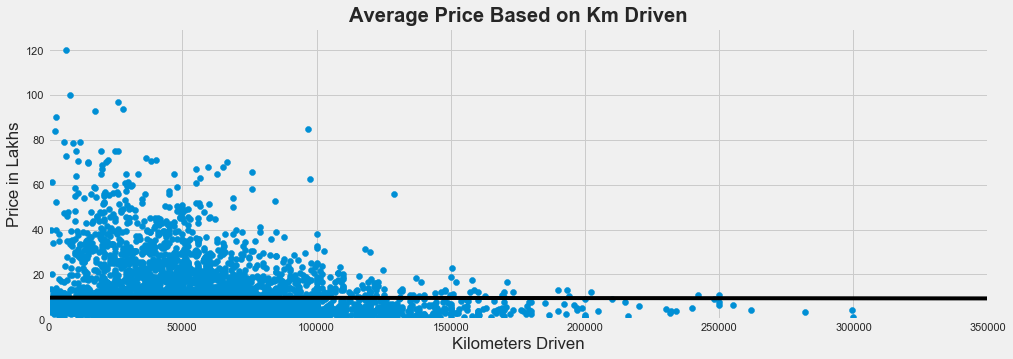

In [358]:
p = np.poly1d(np.polyfit(train['Kilometers_Driven'], train['Price'], 1)) 
xp = np.arange(0,350000)

plt.scatter(train['Kilometers_Driven'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Km Driven', fontweight='bold')
plt.xlabel('Kilometers Driven') 
plt.ylabel('Price in Lakhs') 
plt.xlim([0,350000]) 
plt.ylim([0,130])

plt.show()

The above shown regression line isn't visualized as we expect it to. This is probably because of an outlier data point very far apart from all other data points which is messing up our regression model. Let's get rid of that.

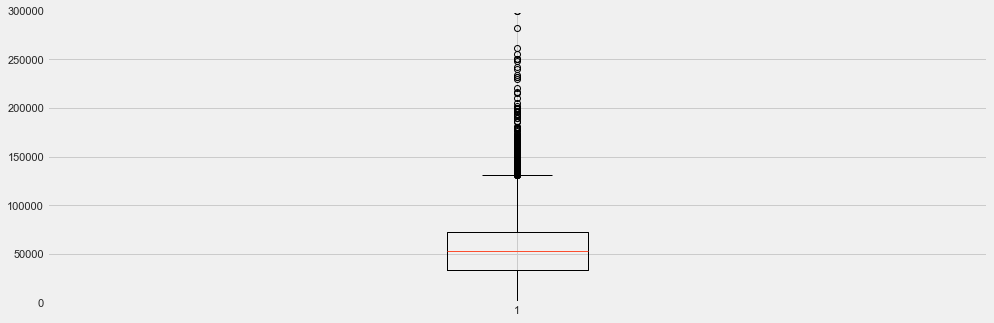

Total number of outliers:  199
Total rows of data:  5872


In [359]:
# Removing Outliers 

plt.boxplot(train['Kilometers_Driven'])
plt.ylim([0,300000])
plt.show()

q1 = np.percentile(train['Kilometers_Driven'], 25) 
q2 = np.percentile(train['Kilometers_Driven'], 50) 
q3 = np.percentile(train['Kilometers_Driven'], 75) 

iqr = q3-q1
lower_whisker = train[train['Kilometers_Driven'] <= q1-1.5*iqr]['Kilometers_Driven'].max()
upper_whisker = train[train['Kilometers_Driven'] <= q3+1.5*iqr]['Kilometers_Driven'].max()

print('Total number of outliers: ',train[train['Kilometers_Driven'] > upper_whisker]['Kilometers_Driven'].count())
print('Total rows of data: ',train.shape[0])

# Since only 199 out of 5872 rows are outliers, we can remove them without impacting our model as it's a very small fraction of our dataset

train = train[train['Kilometers_Driven'] < upper_whisker]


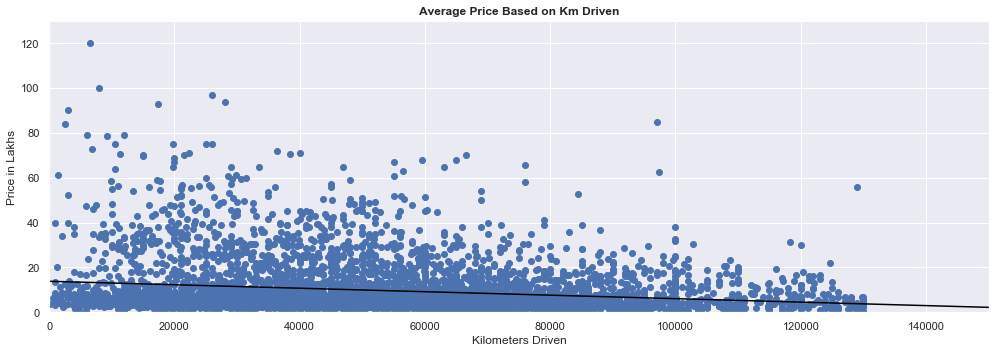

In [360]:
import seaborn as sns 
sns.set()

p = np.poly1d(np.polyfit(train['Kilometers_Driven'], train['Price'], 1)) 
xp = np.arange(0,350000)
plt.scatter(train['Kilometers_Driven'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Km Driven', fontweight='bold')
plt.xlabel('Kilometers Driven') 
plt.ylabel('Price in Lakhs') 
plt.xlim([0,150000]) 
plt.ylim([0,130])
plt.show()

We can see a very small trend here wherein Km increase leads to price decrease. Not a big contributor though!

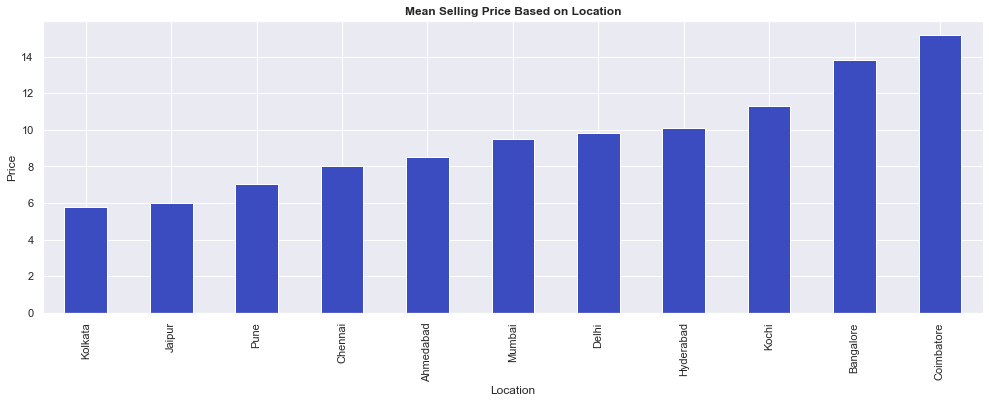

In [361]:
# Location vs Price 

train.groupby('Location')['Price'].mean().sort_values().plot(kind='bar', colormap='coolwarm') 
plt.ylabel('Price') 
plt.title('Mean Selling Price Based on Location', fontweight = 'bold')
plt.show()

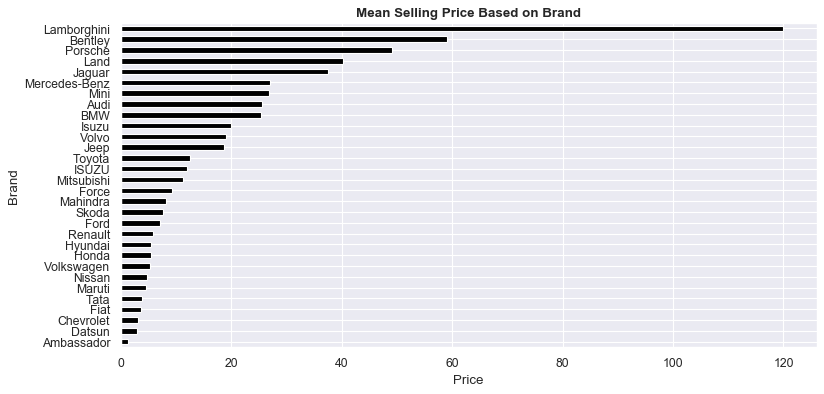

In [362]:
# Brand vs Price

plt.figure(figsize=(10,5),dpi=80)

train.groupby('Brand')['Price'].mean().sort_values().plot(kind='barh', colormap='gist_gray') 
plt.xlabel('Price') 
plt.title('Mean Selling Price Based on Brand', fontweight = 'bold')
plt.show()

Lamborghini is leading the price charts significantly, followed by Bentley and Porsche

[Text(0, 0, 'Ambassador'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Bentley'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Datsun'),
 Text(0, 0, 'Fiat'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'ISUZU'),
 Text(0, 0, 'Isuzu'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Lamborghini'),
 Text(0, 0, 'Land'),
 Text(0, 0, 'Mahindra'),
 Text(0, 0, 'Maruti'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'Mini'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Skoda'),
 Text(0, 0, 'Tata'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Volvo')]

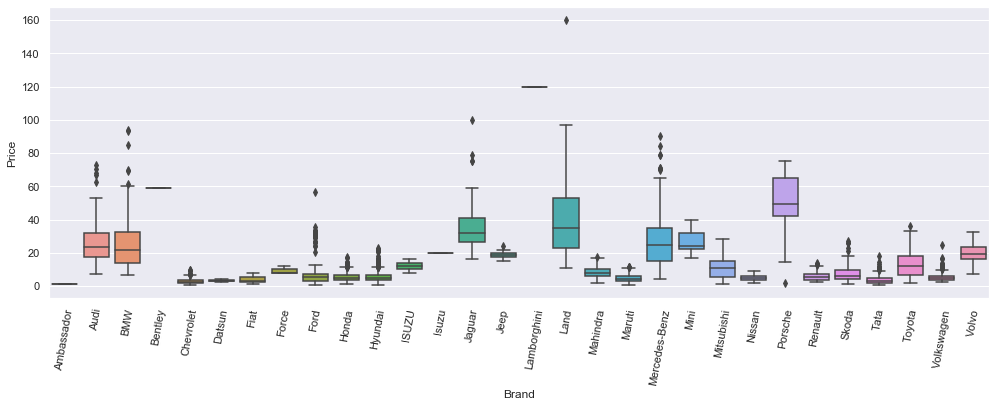

In [363]:
# Outliers in Brands' Prices

sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Brand', y='Price', data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)

From the above graph we can see that most of the companies work in a certain price range and thus have their upper and lower whisker very close to each other. There are exceptions like Mercedes which has a bigger price range in it's cars which means it sells both high end and average priced cars. 

Companies like Lamborghini are not even visible in this graph because the prices of it is so high that only its lower whisker is visible in the graph!

In [364]:
train[train['Engine'] > 3000]['Brand'].value_counts()

# Since outliers are representative of a brand, maybe we should not get rid of it? 

Ford             16
Mercedes-Benz    15
Audi              7
Porsche           5
Land              5
BMW               3
Skoda             2
Jaguar            2
Bentley           1
Lamborghini       1
Volvo             0
Honda             0
Fiat              0
Force             0
ISUZU             0
Datsun            0
Chevrolet         0
Hyundai           0
Jeep              0
Isuzu             0
Volkswagen        0
Mahindra          0
Maruti            0
Mini              0
Mitsubishi        0
Nissan            0
Renault           0
Tata              0
Toyota            0
Ambassador        0
Name: Brand, dtype: int64

In [365]:
def remove_outliers(feature, df):
    q1 = np.percentile(df[feature], 25) 
    q2 = np.percentile(df[feature], 50) 
    q3 = np.percentile(df[feature], 75) 

    iqr = q3-q1    
    lower_whisker = df[df[feature] >= q1-1.5*iqr][feature].min()
    upper_whisker = df[df[feature] <= q3+1.5*iqr][feature].max()
    
    return  df[(df[feature] < upper_whisker) & (df[feature]>lower_whisker)] 

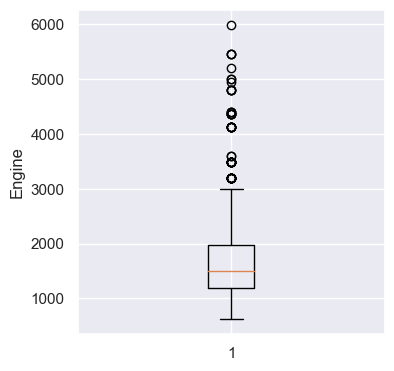

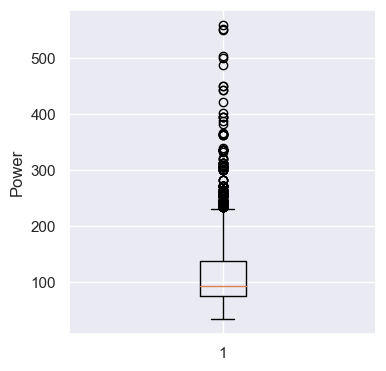

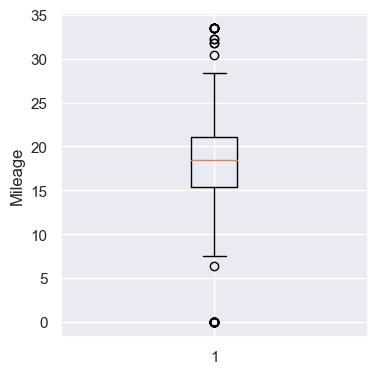

In [366]:
# Visualizing Outliers 

# ----ENGINE----

plt.figure(figsize=(12,4), dpi = 100) 

plt.subplot(1,3,1) 
plt.boxplot(train['Engine']) 
plt.ylabel('Engine') 

# ----POWER----

plt.figure(figsize=(12,4), dpi = 100) 

plt.subplot(1,3,2) 
plt.boxplot(train['Power']) 
plt.ylabel('Power') 

# ----Mileage----

plt.figure(figsize=(12,4), dpi = 100) 

plt.subplot(1,3,3) 
plt.boxplot(train['Mileage']) 
plt.ylabel('Mileage') 
plt.show()

train = remove_outliers('Engine', train)
train = remove_outliers('Power',train)
train = remove_outliers('Mileage', train)


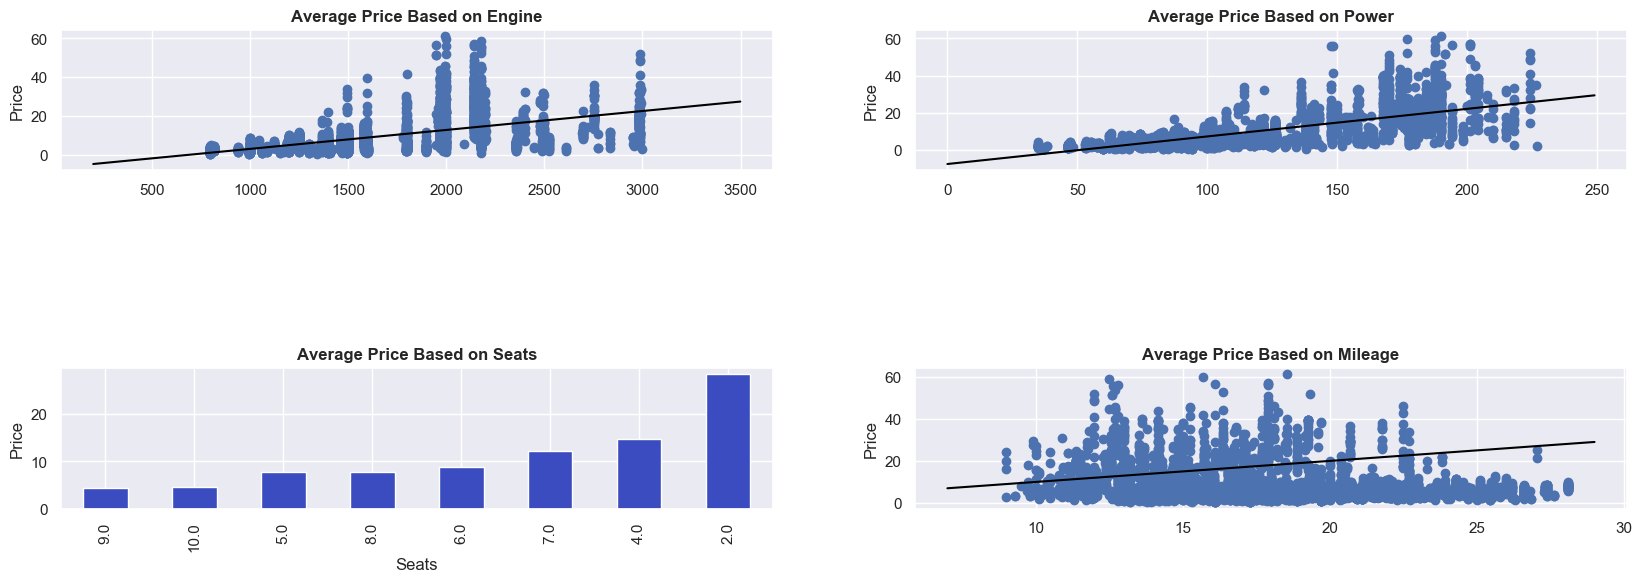

In [367]:
plt.figure(figsize=(18,8), dpi=100) 

# ---------ENGINE --------------



plt.subplot(4,2,1) 
p = np.poly1d(np.polyfit(train['Engine'], train['Price'], 1)) 
xp = np.arange(200,3500)

plt.scatter(train['Engine'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Engine', fontweight='bold')
plt.ylabel('Price')

# ---------Power --------------

plt.subplot(4,2,2) 


# print(train.head())
p = np.poly1d(np.polyfit(train['Power'], train['Price'], 1)) 
xp = np.arange(0,250)

plt.scatter(train['Power'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Power', fontweight='bold')
plt.ylabel('Price')

# ---------Seats --------------

plt.subplot(4,2,5)
train.groupby('Seats')['Price'].mean().sort_values().plot(kind='bar', colormap='coolwarm')
plt.title('Average Price Based on Seats', fontweight='bold')
plt.ylabel('Price')

# ---------Mileage--------------

plt.subplot(4,2,6) 



p = np.poly1d(np.polyfit(train['Mileage'], train['Mileage'], 1)) 
xp = np.arange(7,30)

plt.scatter(train['Mileage'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Mileage', fontweight='bold')
plt.ylabel('Price')
plt.show()


# MACHINE LEARNING MODEL IMPLEMENTATIONS

Below, we are using different models and testing out their accuracies with the testing data set. 

### Multiple Regression OLS Model

Ordinary Least Square Model

In [368]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [369]:
df = train
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [370]:
df['Location_cat'] = df['Location'].cat.codes
df['Fuel_Type_cat'] = df['Fuel_Type'].cat.codes
df['Transmission_cat'] = df['Transmission'].cat.codes
df['Owner_Type_cat'] = df['Owner_Type'].cat.codes
df['Brand_cat'] = df['Brand'].cat.codes


df['Year'] = df.Year.astype('category') 
df['Year_cat'] = df['Year'].cat.codes


df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Location_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Brand_cat,Year_cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,9,0,1,0,18,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10,1,1,0,10,17
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,2,3,1,0,9,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,2,1,1,0,18,14
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,3,1,0,2,1,15


In [371]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Location_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Brand_cat,Year_cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,9,0,1,0,18,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10,1,1,0,10,17
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,2,3,1,0,9,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,2,1,1,0,18,14
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,3,1,0,2,1,15


In [372]:
# Shuffling our data set

df = df.sample(frac = 1).reset_index(drop=True)
df.head() 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Location_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Brand_cat,Year_cat
0,Hyundai i20 Sportz 1.2,Delhi,2015,42000,Petrol,Manual,Second,18.60,1197.0,81.83,5.0,5.80,Hyundai,4,3,1,2,10,17
1,Maruti Celerio ZXI,Chennai,2015,57818,Petrol,Manual,First,23.10,998.0,67.04,5.0,4.30,Maruti,2,3,1,0,18,17
2,Chevrolet Optra Magnum 2.0 LS BSIII,Coimbatore,2008,82160,Diesel,Manual,First,16.52,1991.0,123.70,5.0,2.57,Chevrolet,3,1,1,0,4,10
3,Maruti Ciaz 1.4 Delta,Coimbatore,2018,7784,Petrol,Manual,First,20.73,1373.0,91.10,5.0,8.76,Maruti,3,3,1,0,18,20
4,Volkswagen Vento 1.5 TDI Highline AT,Mumbai,2016,25500,Diesel,Automatic,First,21.50,1498.0,108.50,5.0,8.95,Volkswagen,9,1,0,0,28,18


In [373]:
# Setting X and y for model

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Location_cat', 'Fuel_Type_cat', 'Transmission_cat','Owner_Type_cat', 'Brand_cat', 'Year_cat', 'Engine', 'Power','Seats']]
y = df.Price

X.head()

,Location_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Brand_cat,Year_cat,Engine,Power,Seats
0,4,3,1,2,10,17,1197.0,81.83,5.0
1,2,3,1,0,18,17,998.0,67.04,5.0
2,3,1,1,0,4,10,1991.0,123.70,5.0
3,3,3,1,0,18,20,1373.0,91.10,5.0
4,9,1,0,0,28,18,1498.0,108.50,5.0


#### Using Train Test Split

In [374]:
# Splitting training and testing data 
# Train Test Split

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)


(4247, 9) (4247,)
(1062, 9) (1062,)


In [375]:
# Scaling continuous features (No scaling for categorical variables)

X_train[['Engine', 'Power']] = scale.fit_transform(X_train[['Engine', 'Power']])


est = sm.OLS(y_train,X_train).fit()
print(est.summary()) 


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              2568.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                        0.00
Time:                        23:47:54   Log-Likelihood:                         -12477.
No. Observations:                4247   AIC:                                  2.497e+04
Df Residuals:                    4238   BIC:                                  2.503e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [376]:
# Predicted Values for Testing Data

X_test[['Engine', 'Power']] = scale.transform(X_test[['Engine', 'Power']])
y_predicted = est.predict(X_test)
y_predicted

2855     5.220265
901     13.975978
4357    13.922504
1183    10.771390
4570    19.666614
          ...    
4505     9.365442
358      2.267881
386      4.346869
3104     4.565411
3587     9.412678
Length: 1062, dtype: float64

In [377]:
# R2 value for y_test and y_predictions

from sklearn.metrics import r2_score 

r2 = r2_score(y_test, y_predicted) 
print(r2)

0.7029711699459328


#### Using K Folds Cross Validation

Cross Validation Scores:  [0.64126062 0.69893062 0.68267468 0.69257942 0.70043067 0.67626705
 0.67855657 0.68016057 0.71577997 0.69183481] 

Cross Predicted Accuracy:  0.6866332394533261


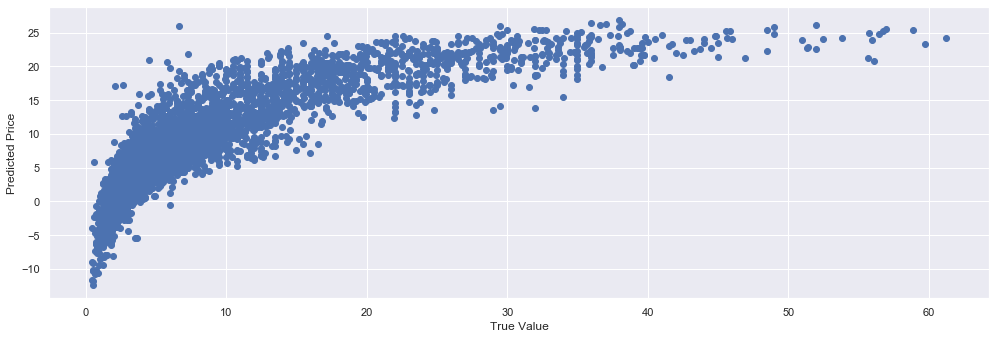

In [378]:
# ---------Fitting Model and Training K-1 subsets------------

from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,y) 

scores = cross_val_score(model, X, y, cv=10)  # K = 10 Folds
print("Cross Validation Scores: ", scores, '\n') 

# ---------Predicting Price with K Folds Validation------------

predictions = cross_val_predict(model, X,y, cv=10) 
accuracy = r2_score(y, predictions) 

print("Cross Predicted Accuracy: ", accuracy)
plt.scatter(y, predictions) 
plt.ylabel('Predicted Price') 
plt.xlabel('True Value')
plt.show()

Our Multiple Regression Model predicted negative prices as well. Seeing as that is probably not a good model, we decided to use Random Forest Regressor which does a much better job!

### Random Forest Model

#### Using Train Test Split

In [379]:
from sklearn.ensemble import RandomForestRegressor 

RFModel = RandomForestRegressor(random_state = 30) 
RFModel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [380]:
y_predicted = RFModel.predict(X_test)
y_predicted

array([ 6.0331    , 10.56976667, 11.94915333, ...,  4.45509   ,
        4.45881667,  5.2496675 ])

In [381]:
r2 = r2_score(y_test, y_predicted)
r2

0.9162484292827933

#### Using K Folds Cross Validation

Cross Validation Scores:  [0.9038727  0.91395282 0.92098586 0.88493386 0.90288654 0.91626293
 0.90803211 0.92033372 0.93198125 0.92171346] 

Cross Predicted Accuracy:  0.9127144149159827


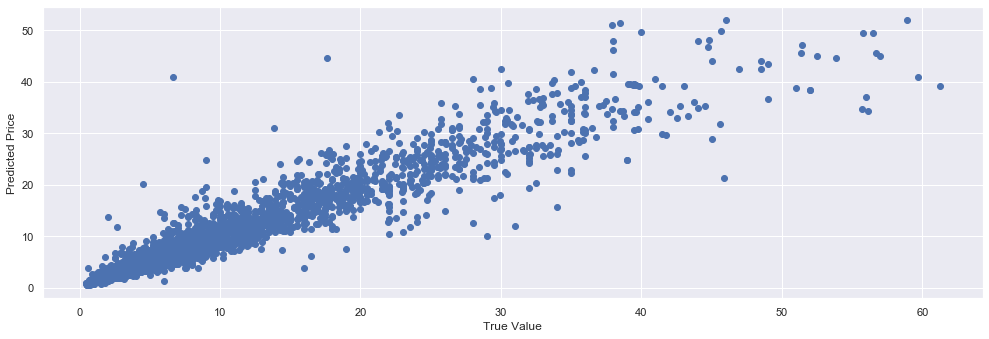

In [382]:
# ---------Fitting Model and Training K-1 subsets------------

scores = cross_val_score(RFModel, X, y, cv=10)  # K = 10 Folds
print("Cross Validation Scores: ", scores, '\n') 

# ---------Predicting Price with K Folds Validation------------

predictions = cross_val_predict(RFModel, X,y, cv=10) 
accuracy = r2_score(y, predictions) 

print("Cross Predicted Accuracy: ", accuracy)
plt.scatter(y, predictions) 
plt.ylabel('Predicted Price') 
plt.xlabel('True Value')
plt.show()

From the above graph, we can say that our model is pretty accurate for lower-mid range priced vehicles. As the price tends to go higher, the predictions start going a little off. 

# Price Predictions for Test_Data 

Here, we predict the prices in the Test_Data.xlsx file. Since the prices weren't given to test it with, we split the Data_Train.xlsx into a Training and Testing dataset. 

Hoping you have the true prices of Test_Data dataset, we present its predicted prices for you

In [390]:
test_df = pd.read_excel('Data_Test.xlsx') 
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [391]:
# Converting Dataset into usable form 

pd.options.mode.chained_assignment = None 

test_df.dropna(how='any', inplace=True) 
test_df['Mileage'] = test_df.Mileage.str.replace('km/kg','')
test_df['Mileage'] = test_df.Mileage.str.replace('kmpl','') 
test_df['Engine'] = test_df.Engine.str.replace('CC','') 
test_df['Power'] = test_df['Power'].str.replace('bhp', '')
test_df['Power'] = test_df['Power'].str.strip() 
test_df = test_df[test_df['Power'] != 'null'] 
test_df['Power'] = test_df['Power'].astype(float) 
test_df['Mileage'] = test_df['Mileage'].astype(float) 
test_df['Engine'] = test_df['Engine'].astype(float)
brand = []
for name in test_df['Name'].str.split():
    brand.append(name[0]) 
test_df['Brand'] = brand 

test_df['Fuel_Type'] = test_df['Fuel_Type'].astype('category') 
test_df['Transmission'] = test_df['Transmission'].astype('category') 
test_df['Location'] = test_df['Location'].astype('category') 
test_df['Brand'] = test_df['Brand'].astype('category') 
test_df['Owner_Type'] = test_df['Owner_Type'].astype('category') 

test_df['Location_cat'] = test_df['Location'].cat.codes
test_df['Fuel_Type_cat'] = test_df['Fuel_Type'].cat.codes
test_df['Transmission_cat'] = test_df['Transmission'].cat.codes
test_df['Owner_Type_cat'] = test_df['Owner_Type'].cat.codes
test_df['Brand_cat'] = test_df['Brand'].cat.codes
test_df['Year'] = test_df.Year.astype('category') 
test_df['Year_cat'] = test_df['Year'].cat.codes


In [392]:
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Location_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Brand_cat,Year_cat
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,Maruti,4,0,1,0,15,13
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,Maruti,3,3,1,2,15,12
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,Toyota,9,1,1,0,25,16
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,Hyundai,9,3,1,0,8,13
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,Mahindra,3,1,1,2,14,15


In [394]:
X = test_df[['Location_cat', 'Fuel_Type_cat', 'Transmission_cat','Owner_Type_cat', 'Brand_cat', 'Year_cat', 'Engine', 'Power','Seats']]

test_predictions = RFModel.predict(X)
print(test_predictions)

[20.9249     17.8031     30.47986667 ... 17.4115     16.9102
 18.8662    ]


Hopefully these predictions are very close to the real prices! 

# End Of Project 

This marks the end of this project. A small summary of the process we went through: 

--> Imported and cleaned dataset. 
--> Did the EDA of the data available to check correlation of individual features with price and make some conclusions. 
--> Did Linear Regression for every correlation of individual feature vs price 
--> Used Multiple Regression Model first on our dataset. The model wasn't perfect and we faced negative price predictions. Solution?  We decided to go with a Random Forest Regressor instead. This model did a much better job and had an R2 score of 91% 

--> Used Train_Test_Split to cross validate. We also used KFolds to get rid of any inaccuracies in obtaining accuracy score. 

